In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn

In [1]:
business = pd.read_csv(('../../yelp-data/yelp_academic_dataset_business.csv'))
checkin = pd.read_csv(('../../yelp-data/yelp_academic_dataset_checkin.csv'))
review = pd.read_csv(('../../yelp-data/yelp_academic_dataset_review.csv'))
tip = pd.read_csv(('../../yelp-data/yelp_academic_dataset_tip.csv'))
user = pd.read_csv(('../../yelp-data/yelp_academic_dataset_user.csv'))

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,7,11,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Business Data Exploration

In [3]:
business.shape

(85901, 56)

In [4]:
business.head()

,attributes_Accepts Credit Cards,attributes_Accepts Insurance,attributes_Ages Allowed,attributes_Alcohol,attributes_Ambience,attributes_Attire,attributes_BYOB,attributes_BYOB/Corkage,attributes_By Appointment Only,attributes_Caters,...,hours_Wednesday,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,True,NaN,NaN,none,"{u'romantic': False, u'intimate': False, u'cla...",casual,NaN,NaN,NaN,False,...,"{u'close': u'21:00', u'open': u'11:00'}",40.354327,-79.900706,Mr Hoagie,NaN,True,7,3.5,PA,business
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.350553,-79.886814,Clancy's Pub,NaN,True,5,3.0,PA,business
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.354116,-80.014660,Cool Springs Golf Center,NaN,False,5,2.5,PA,business
3,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'cla...",casual,NaN,NaN,NaN,True,...,"{u'close': u'19:00', u'open': u'10:00'}",40.408830,-79.866211,Emil's Lounge,NaN,True,26,4.5,PA,business
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{u'close': u'20:00', u'open': u'11:00'}",40.403405,-79.855782,Grand View Golf Club,NaN,True,3,5.0,PA,business


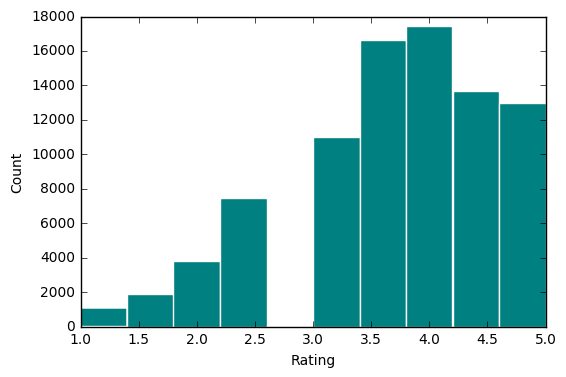

In [5]:
plt.hist(business.stars, color='#008080', edgecolor='white')
plt.xlabel("Rating")
plt.ylabel("Count")

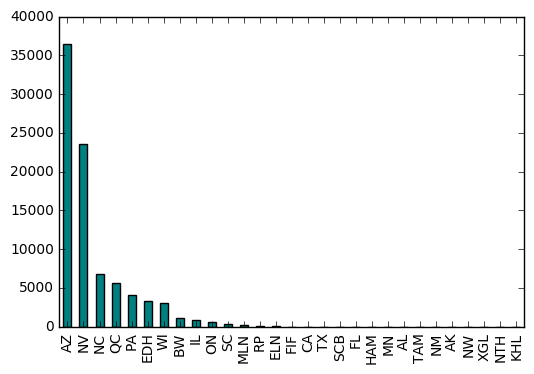

In [6]:
business.state.value_counts().plot(kind='bar',color='#008080')

## Checkin Data Exploration

In [7]:
checkin.shape

(61049, 170)

In [8]:
checkin.head()

,business_id,checkin_info_0-0,checkin_info_0-1,checkin_info_0-2,checkin_info_0-3,checkin_info_0-4,checkin_info_0-5,checkin_info_0-6,checkin_info_1-0,checkin_info_1-1,...,checkin_info_8-5,checkin_info_8-6,checkin_info_9-0,checkin_info_9-1,checkin_info_9-2,checkin_info_9-3,checkin_info_9-4,checkin_info_9-5,checkin_info_9-6,type
0,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,checkin
1,mVHrayjG3uZ_RLHkLj-AMg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,checkin
2,mYSpR_SLPgUVymYOvTQd_Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,checkin
3,KayYbHCt-RkbGcPdGOThNg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,5.0,NaN,NaN,checkin
4,b12U9TFESStdy7CsTtcOeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,checkin


## Review Data Exploration

In [9]:
review.head()

,business_id,date,review_id,stars,text,type,user_id,votes_cool,votes_funny,votes_useful
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,0.0,0.0,0.0
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,0.0,0.0,0.0
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,0.0,1.0,1.0
3,5UmKMjUEUNdYWqANhGckJw,2015-12-26,pVMIt0a_QsKtuDfWVfSk2A,3,PROS: Italian hoagie was delicious. Friendly ...,review,qiczib2fO_1VBG8IoCGvVg,0.0,0.0,0.0
4,5UmKMjUEUNdYWqANhGckJw,2016-04-08,AEyiQ_Y44isJmNbMTyoMKQ,2,First the only reason this place could possibl...,review,qEE5EvV-f-s7yHC0Z4ydJQ,0.0,0.0,1.0


In [10]:
review.describe()
# may want to replace 0s with NAs

,stars,votes_cool,votes_funny,votes_useful
count,2.685067e+06,2.685065e+06,2.685065e+06,2.685065e+06
mean,3.764207e+00,5.389765e-01,4.310592e-01,1.006813e+00
std,1.390084e+00,1.781651e+00,1.580670e+00,2.233418e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,1.530000e+02,1.510000e+02,1.680000e+02


In [11]:
# could do the following... probably best to flag those 0 data as NAN
# review.votes_cool[review.votes_cool==0] = np.NaN
# review.votes_funny[review.votes_funny==0] = np.NaN
# review.votes_useful[review.votes_useful==0] = np.NaN

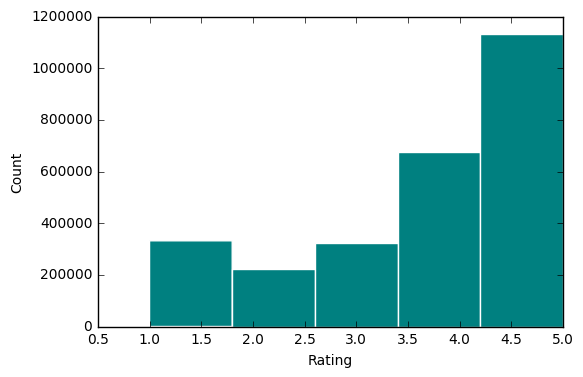

In [12]:
plt.hist(review.stars, color='#008080', edgecolor='white', bins=5)
plt.xlabel("Rating")
plt.ylabel("Count")

## Tip Data Exploration

In [13]:
tip.head()

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


## User Data Exploration

In [14]:
user.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,...,fans,friends,name,review_count,type,user_id,votes_cool,votes_funny,votes_useful,yelping_since
0,4.14,76.0,15.0,11.0,48.0,NaN,3.0,20.0,14.0,25.0,...,69,"[,u,',r,p,O,y,q,D,_,8,9,3,c,q,m,D,A,t,J,L,b,d,...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,246,167,282,2004-10
1,3.67,1675.0,204.0,594.0,1111.0,38.0,137.0,611.0,361.0,970.0,...,1345,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,12091,8399,15242,2004-10
2,3.68,134.0,22.0,96.0,99.0,4.0,18.0,79.0,27.0,86.0,...,105,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,657,722,1349,2004-10
3,4.64,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10
4,3.80,1.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,2.0,...,5,"[,u,',r,p,O,y,q,D,_,8,9,3,c,q,m,D,A,t,J,L,b,d,...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,16,13,37,2004-10


In [15]:
list(user.columns.values)

['average_stars',
 'compliments_cool',
 'compliments_cute',
 'compliments_funny',
 'compliments_hot',
 'compliments_list',
 'compliments_more',
 'compliments_note',
 'compliments_photos',
 'compliments_plain',
 'compliments_profile',
 'compliments_writer',
 'elite',
 'fans',
 'friends',
 'name',
 'review_count',
 'type',
 'user_id',
 'votes_cool',
 'votes_funny',
 'votes_useful',
 'yelping_since']

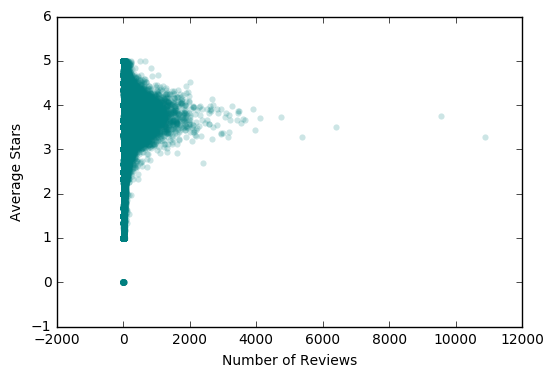

In [16]:
plt.scatter(user.review_count, user.average_stars, lw=0, alpha=.2, color='#008080')
plt.xlabel("Number of Reviews")
plt.ylabel("Average Stars")

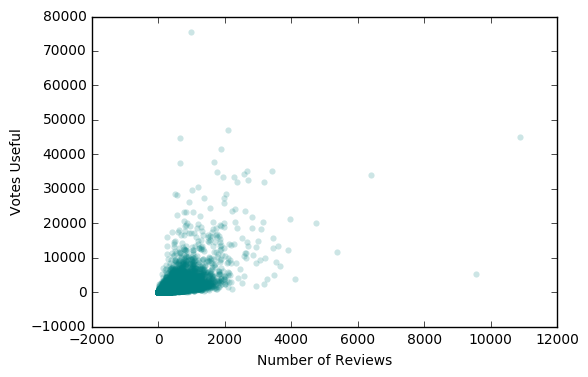

In [17]:
plt.scatter(user.review_count, user.votes_useful, lw=0, alpha=.2, color='#008080')
plt.xlabel("Number of Reviews")
plt.ylabel("Votes Useful")

# Merging Biz Subset to Reviews Data

In [22]:
biz_subset = pd.read_csv(('../../yelp-data/biz_edit.csv'))

In [23]:
data = pd.merge(biz_subset, review, on='business_id')
data.head()

,AcceptsCreditCards,AgesAllowed,Alcohol,Attire,BYOB/Corkage,Caters,Delivery,DietaryRestrictions,DogsAllowed,Drive-Thru,...,biz_type,date,review_id,stars,text,type,user_id,votes_cool,votes_funny,votes_useful
0,True,NaN,full_bar,casual,NaN,True,False,NaN,NaN,NaN,...,business,2012-08-06,IhLPy_qJqRyGb_vGwHNeaQ,4,We decided on Sapporo after reading so-so revi...,review,e6GiLUdbUaPX7-P9QtHrXg,0.0,0.0,1.0
1,True,NaN,full_bar,casual,NaN,True,False,NaN,NaN,NaN,...,business,2013-04-22,qUkI_rNF-xpaQXqvdpb1hg,5,I travel a lot and have eaten at a lot of Hiba...,review,UANFI1i2-xcOVIU8DYBdkw,0.0,0.0,0.0
2,True,NaN,full_bar,casual,NaN,True,False,NaN,NaN,NaN,...,business,2014-02-15,S1ng7qqc0Q-OZIs62cwpyw,1,The food was alright. Not good. Not bad. And c...,review,6ZyqtV5nQPL2RjMhfHOxWQ,0.0,0.0,0.0
3,True,NaN,full_bar,casual,NaN,True,False,NaN,NaN,NaN,...,business,2014-07-26,9mVDyUano9-a-dIoOjTY3Q,5,"Sapporo is my favorite Japanese restaurant, pe...",review,5yC_sdGnYfXTX7Djp_4SVQ,0.0,0.0,2.0
4,True,NaN,full_bar,casual,NaN,True,False,NaN,NaN,NaN,...,business,2015-07-10,FxcalYSYxfrA9AOJq3xEzA,5,"Been to many hibachis, this one is very clean,...",review,hlpHSNcosmjXQ-gfGXFGRw,0.0,0.0,0.0


In [24]:
data.shape

(115094, 58)

In [25]:
list(data.columns.values)

['AcceptsCreditCards',
 'AgesAllowed',
 'Alcohol',
 'Attire',
 'BYOB/Corkage',
 'Caters',
 'Delivery',
 'DietaryRestrictions',
 'DogsAllowed',
 'Drive-Thru',
 'GoodFor',
 'GoodForDancing',
 'GoodForGroups',
 'GoodForKids',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OrderAtCounter',
 'OutdoorSeating',
 'Parking',
 'PriceRange',
 'Smoking',
 'Take-out',
 'TakesReservations',
 'WaiterService',
 'WheelchairAccessible',
 'Wi-Fi',
 'business_id',
 'categories',
 'city',
 'full_address',
 'hours_Friday',
 'hours_Monday',
 'hours_Saturday',
 'hours_Sunday',
 'hours_Thursday',
 'hours_Tuesday',
 'hours_Wednesday',
 'latitude',
 'longitude',
 'name',
 'neighborhoods',
 'open',
 'review_count',
 'biz_stars',
 'state',
 'biz_type',
 'date',
 'review_id',
 'stars',
 'text',
 'type',
 'user_id',
 'votes_cool',
 'votes_funny',
 'votes_useful']

In [26]:
data.to_csv('../../yelp-data/data.csv',index=False)

## Merge full dataset

In [2]:
master_data = pd.merge(business, review, on='business_id')

In [3]:
master_data.columns

Index([u'attributes_Accepts Credit Cards', u'attributes_Accepts Insurance',
       u'attributes_Ages Allowed', u'attributes_Alcohol',
       u'attributes_Ambience', u'attributes_Attire', u'attributes_BYOB',
       u'attributes_BYOB/Corkage', u'attributes_By Appointment Only',
       u'attributes_Caters', u'attributes_Coat Check', u'attributes_Corkage',
       u'attributes_Delivery', u'attributes_Dietary Restrictions',
       u'attributes_Dogs Allowed', u'attributes_Drive-Thru',
       u'attributes_Good For', u'attributes_Good For Dancing',
       u'attributes_Good For Groups', u'attributes_Good for Kids',
       u'attributes_Hair Types Specialized In', u'attributes_Happy Hour',
       u'attributes_Has TV', u'attributes_Music', u'attributes_Noise Level',
       u'attributes_Open 24 Hours', u'attributes_Order at Counter',
       u'attributes_Outdoor Seating', u'attributes_Parking',
       u'attributes_Price Range', u'attributes_Smoking',
       u'attributes_Take-out', u'attributes_Takes 

In [4]:
master_data['Steakhouses'] = master_data['categories'].str.contains('Steakhouses')
master_data['Steak'] = master_data['text'].str.contains('Steak')
master_data['steak'] = master_data['text'].str.contains('steak')

In [5]:
master_data.type_y.unique()

array(['review', nan], dtype=object)

y refers to review, while x refers to business

In [6]:
master_data.steak.unique()

array([False, True], dtype=object)

Let's subset the data so we get all the rows that include Steakhouses, Steak, OR steak

In [8]:
subset = master_data[(master_data.Steakhouses == True) | (master_data.Steak == True) | (master_data.steak == True)]

In [9]:
subset.shape

(156695, 68)

In [2]:
import seaborn as sns
sns.set_style("darkgrid")

/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


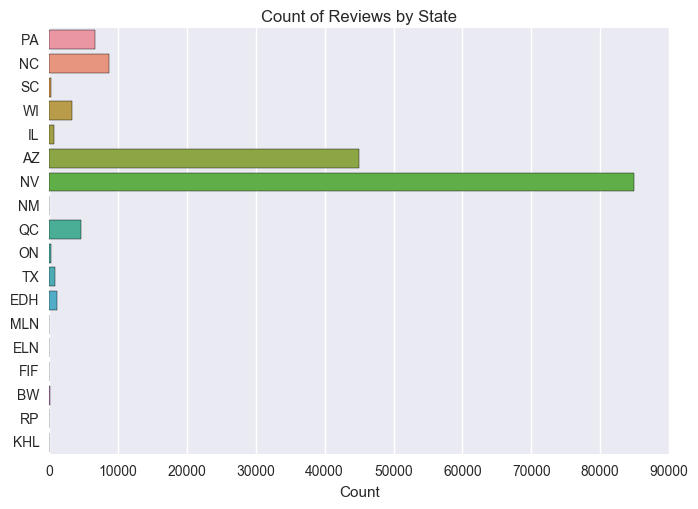

In [13]:
sns.countplot(y='state', data=subset)
plt.ylabel('')
plt.xlabel('Count')
plt.title('Count of Reviews by State')

In [14]:
subset.to_csv('../../yelp-data/new_data/data.csv',index=False)
# includes messy cols, but no prob

In [15]:
subset.columns

Index([u'attributes_Accepts Credit Cards', u'attributes_Accepts Insurance',
       u'attributes_Ages Allowed', u'attributes_Alcohol',
       u'attributes_Ambience', u'attributes_Attire', u'attributes_BYOB',
       u'attributes_BYOB/Corkage', u'attributes_By Appointment Only',
       u'attributes_Caters', u'attributes_Coat Check', u'attributes_Corkage',
       u'attributes_Delivery', u'attributes_Dietary Restrictions',
       u'attributes_Dogs Allowed', u'attributes_Drive-Thru',
       u'attributes_Good For', u'attributes_Good For Dancing',
       u'attributes_Good For Groups', u'attributes_Good for Kids',
       u'attributes_Hair Types Specialized In', u'attributes_Happy Hour',
       u'attributes_Has TV', u'attributes_Music', u'attributes_Noise Level',
       u'attributes_Open 24 Hours', u'attributes_Order at Counter',
       u'attributes_Outdoor Seating', u'attributes_Parking',
       u'attributes_Price Range', u'attributes_Smoking',
       u'attributes_Take-out', u'attributes_Takes 

In [16]:
del subset['attributes_Accepts Insurance']
del subset['attributes_Ages Allowed']
del subset['attributes_Ambience']
del subset['attributes_BYOB']
del subset['attributes_BYOB/Corkage']
del subset['attributes_By Appointment Only']
del subset['attributes_Coat Check']
del subset['attributes_Corkage']
del subset['attributes_Dogs Allowed']
del subset['attributes_Good For']
del subset['attributes_Good For Dancing']
del subset['attributes_Good For Groups']
del subset['attributes_Hair Types Specialized In']
del subset['attributes_Parking']
del subset['hours_Friday']
del subset['hours_Monday']
del subset['hours_Saturday']
del subset['hours_Sunday']
del subset['hours_Thursday']
del subset['hours_Tuesday']
del subset['hours_Wednesday']
del subset['type_x']
del subset['type_y']

In [18]:
subset.shape

(156695, 45)

In [19]:
subset.columns

Index([u'attributes_Accepts Credit Cards', u'attributes_Alcohol',
       u'attributes_Attire', u'attributes_Caters', u'attributes_Delivery',
       u'attributes_Dietary Restrictions', u'attributes_Drive-Thru',
       u'attributes_Good for Kids', u'attributes_Happy Hour',
       u'attributes_Has TV', u'attributes_Music', u'attributes_Noise Level',
       u'attributes_Open 24 Hours', u'attributes_Order at Counter',
       u'attributes_Outdoor Seating', u'attributes_Price Range',
       u'attributes_Smoking', u'attributes_Take-out',
       u'attributes_Takes Reservations', u'attributes_Waiter Service',
       u'attributes_Wheelchair Accessible', u'attributes_Wi-Fi',
       u'business_id', u'categories', u'city', u'full_address', u'latitude',
       u'longitude', u'name', u'neighborhoods', u'open', u'review_count',
       u'stars_x', u'state', u'date', u'review_id', u'stars_y', u'text',
       u'user_id', u'votes_cool', u'votes_funny', u'votes_useful',
       u'Steakhouses', u'Steak', u'st

Rename col names

In [23]:
subset.rename(columns={'attributes_Accepts Credit Cards':'CreditCards', 
                       'attributes_Alcohol':'Alcohol', 
                       'attributes_Attire':'Attire', 
                       'attributes_Caters':'Caters',
                       'attributes_Delivery':'Delivery',
                       'attributes_Dietary Restrictions':'DietaryRestrictions',
                       'attributes_Drive-Thru':'DriveThru',
                       'attributes_Good for Kids':'GoodforKids',
                       'attributes_Happy Hour':'HappyHour',
                       'attributes_Has TV':'TV',
                       'attributes_Music':'Music',
                       'attributes_Noise Level':'NoiseLevel',
                       'attributes_Open 24 Hours':'24Hours',
                       'attributes_Order at Counter':'OrderAtCounter',
                       'attributes_Outdoor Seating':'OutdoorSeating',
                       'attributes_Price Range':'PriceRange',
                       'attributes_Smoking':'Smoking',
                       'attributes_Take-out':'Take-out',
                       'attributes_Takes Reservations':'TakesReservations',
                       'attributes_Waiter Service':'WaiterService',
                       'attributes_Wheelchair Accessible':'WheelchairAccessible',
                       'attributes_Wi-Fi':'WiFi',
                       'stars_x':'BusinessStars',
                       'stars_y':'ReviewStars'}, inplace=True)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [24]:
subset.columns

Index([u'CreditCards', u'Alcohol', u'Attire', u'Caters', u'Delivery',
       u'DietaryRestrictions', u'DriveThru', u'GoodforKids', u'HappyHour',
       u'TV', u'Music', u'NoiseLevel', u'24Hours', u'OrderAtCounter',
       u'OutdoorSeating', u'PriceRange', u'Smoking', u'Take-out',
       u'TakesReservations', u'WaiterService', u'WheelchairAccessible',
       u'WiFi', u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'BusinessStars', u'state', u'date', u'review_id',
       u'ReviewStars', u'text', u'user_id', u'votes_cool', u'votes_funny',
       u'votes_useful', u'Steakhouses', u'Steak', u'steak'],
      dtype='object')

Export this full dataset

In [25]:
subset.to_csv('../../yelp-data/new_data/data_subset.csv',index=False)

### Remove last 3 cols for primary analysis...

In [26]:
del subset['Steakhouses']
del subset['Steak']
del subset['steak']

In [27]:
subset.to_csv('../../yelp-data/new_data/subset_final.csv',index=False)

### Add user file, export as data_final

In [2]:
subset = pd.read_csv(('../../yelp-data/new_data/subset_final.csv'))

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Rename user columns

In [4]:
list(user.columns)

['average_stars',
 'compliments_cool',
 'compliments_cute',
 'compliments_funny',
 'compliments_hot',
 'compliments_list',
 'compliments_more',
 'compliments_note',
 'compliments_photos',
 'compliments_plain',
 'compliments_profile',
 'compliments_writer',
 'elite',
 'fans',
 'friends',
 'name',
 'review_count',
 'type',
 'user_id',
 'votes_cool',
 'votes_funny',
 'votes_useful',
 'yelping_since']

In [5]:
user.type.unique()

array(['user'], dtype=object)

In [6]:
del user['type']

In [7]:
user.rename(columns={'average_stars':'user_average_stars',
                      'compliments_cool':'user_compliments_cool',
                      'compliments_cute':'user_compliments_cute',
                      'compliments_funny':'user_compliments_funny',
                      'compliments_hot':'user_compliments_hot',
                      'compliments_list':'user_compliments_list',
                      'compliments_more':'user_compliments_more',
                      'compliments_note':'user_compliments_note',
                      'compliments_photos':'user_compliments_photos',
                      'compliments_plain':'user_compliments_plain',
                      'compliments_profile':'user_compliments_profile',
                      'compliments_writer':'user_compliments_writer',
                      'elite':'user_elite',
                      'fans':'user_fans',
                      'friends':'user_friends',
                      'name':'user_name',
                      'review_count':'user_review_count',
                      'votes_cool':'user_votes_cool',
                      'votes_funny':'user_votes_funny',
                      'votes_useful':'user_votes_useful',
                      'yelping_since':'user_yelping_since',
                      }, inplace=True)

In [18]:
user.user_id.nunique()

686556

In [34]:
# user.loc[: , "user_friends"]

I may not care about some columns here... like:
 - user_compliments_list
 - user_compliments_more
 - user_compliments_note
 - user_compliments_plain
 - user_elite
 - user_friends

In [24]:
del user['user_compliments_list']
del user['user_compliments_more']
del user['user_compliments_note']
del user['user_compliments_plain']
del user['user_elite']
del user['user_friends']

In [36]:
user.columns

Index([u'user_average_stars', u'user_compliments_cool',
       u'user_compliments_cute', u'user_compliments_funny',
       u'user_compliments_hot', u'user_compliments_photos',
       u'user_compliments_profile', u'user_compliments_writer', u'user_fans',
       u'user_name', u'user_review_count', u'user_id', u'user_votes_cool',
       u'user_votes_funny', u'user_votes_useful', u'user_yelping_since'],
      dtype='object')

In [37]:
subset.columns

Index([u'CreditCards', u'Alcohol', u'Attire', u'Caters', u'Delivery',
       u'DietaryRestrictions', u'DriveThru', u'GoodforKids', u'HappyHour',
       u'TV', u'Music', u'NoiseLevel', u'24Hours', u'OrderAtCounter',
       u'OutdoorSeating', u'PriceRange', u'Smoking', u'Take-out',
       u'TakesReservations', u'WaiterService', u'WheelchairAccessible',
       u'WiFi', u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'BusinessStars', u'state', u'date', u'review_id',
       u'ReviewStars', u'text', u'user_id', u'votes_cool', u'votes_funny',
       u'votes_useful'],
      dtype='object')

In [38]:
data = pd.merge(subset, user, on='user_id')

In [39]:
data.to_csv('../../yelp-data/new_data/data_final.csv',index=False)

### How does the file look?

In [3]:
data = pd.read_csv(('../../yelp-data/new_data/data_final.csv'))

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
data.shape

(156695, 57)

In [42]:
data.head()

,CreditCards,Alcohol,Attire,Caters,Delivery,DietaryRestrictions,DriveThru,GoodforKids,HappyHour,TV,...,user_compliments_photos,user_compliments_profile,user_compliments_writer,user_fans,user_name,user_review_count,user_votes_cool,user_votes_funny,user_votes_useful,user_yelping_since
0,True,none,casual,False,False,NaN,False,True,NaN,False,...,NaN,NaN,NaN,1,Jim,26,3,10,26,2012-10
1,True,none,casual,False,False,NaN,False,True,NaN,False,...,NaN,NaN,NaN,0,Jennifer,3,0,0,1,2016-04
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,16.0,10,Molly,158,80,46,161,2012-06
3,True,full_bar,casual,False,False,NaN,NaN,True,NaN,True,...,NaN,NaN,16.0,10,Molly,158,80,46,161,2012-06
4,True,full_bar,casual,False,False,NaN,NaN,False,NaN,False,...,NaN,NaN,16.0,10,Molly,158,80,46,161,2012-06


I won't need all these columns in analysis, but based on what I do, I can further subset this, as necessary...

In [43]:
data.columns

Index([u'CreditCards', u'Alcohol', u'Attire', u'Caters', u'Delivery',
       u'DietaryRestrictions', u'DriveThru', u'GoodforKids', u'HappyHour',
       u'TV', u'Music', u'NoiseLevel', u'24Hours', u'OrderAtCounter',
       u'OutdoorSeating', u'PriceRange', u'Smoking', u'Take-out',
       u'TakesReservations', u'WaiterService', u'WheelchairAccessible',
       u'WiFi', u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'BusinessStars', u'state', u'date', u'review_id',
       u'ReviewStars', u'text', u'user_id', u'votes_cool', u'votes_funny',
       u'votes_useful', u'user_average_stars', u'user_compliments_cool',
       u'user_compliments_cute', u'user_compliments_funny',
       u'user_compliments_hot', u'user_compliments_photos',
       u'user_compliments_profile', u'user_compliments_writer', u'user_fans',
       u'user_name', u'user_review_count', u'user_votes_cool',
       u'user_votes_

In [44]:
data.business_id.nunique()

11700

In [45]:
data.user_id.nunique()

96143

In [46]:
data.review_id.nunique()

156695

11.7K businesses // 96K users // 156.7K reviews !!!!!!

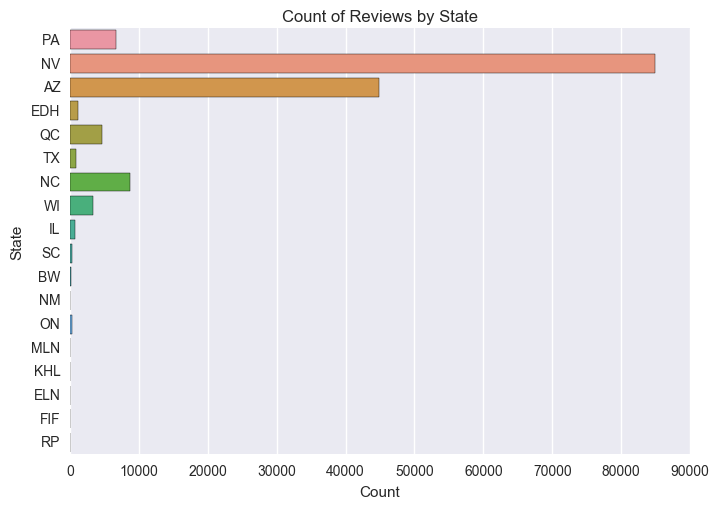

In [11]:
sns.countplot(y='state', data=data)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Count of Reviews by State')

In [15]:
data2 = data[(data.state != 'NV') & (data.state != 'AZ')]

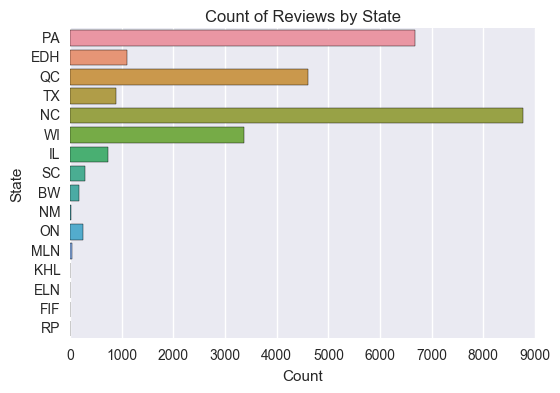

In [16]:
sns.countplot(y='state', data=data2)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Count of Reviews by State')

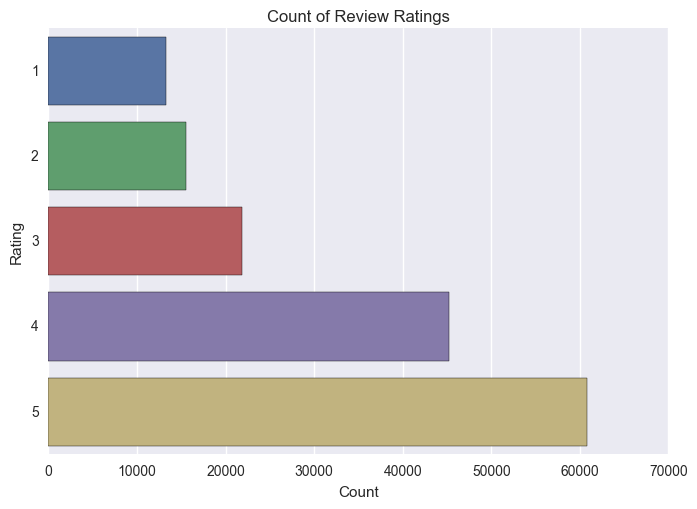

In [12]:
sns.countplot(y='ReviewStars', data=data)
plt.ylabel('Rating')
plt.xlabel('Count')
plt.title('Count of Review Ratings')

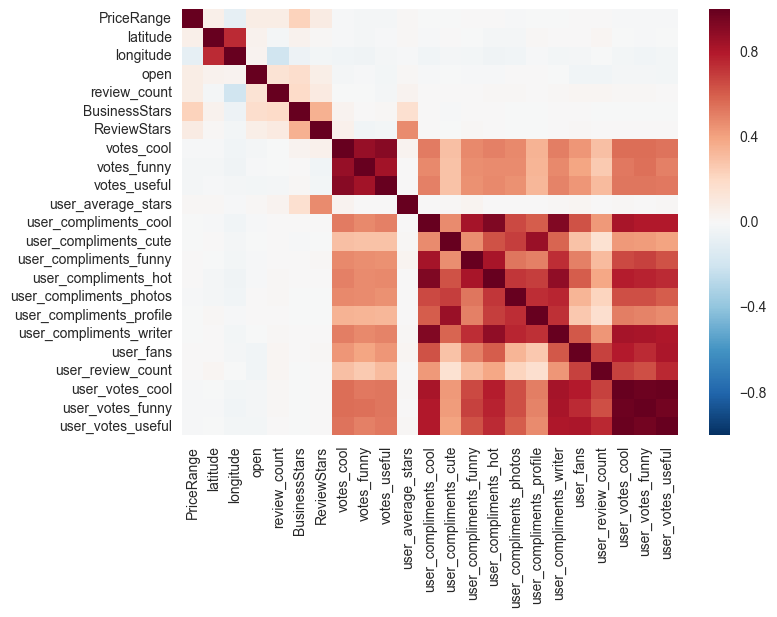

In [4]:
sns.heatmap(data.corr())